In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tiktok/tiktok_dataset.csv


In [5]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


Topic 1: ['colleagues', 'world', 'friends', 'friend', 'colleague', 'discovered', 'media', 'learned', 'read', 'claim']
Topic 2: ['world', 'colleagues', 'friends', 'friend', 'media', 'discovered', 'colleague', 'learned', 'read', 'claim']
Topic 3: ['colleagues', 'discovered', 'friends', 'friend', 'colleague', 'media', 'world', 'learned', 'read', 'claim']
Topic 4: ['solar', 'colleagues', 'discovered', 'friends', 'colleague', 'media', 'friend', 'learned', 'read', 'claim']
Topic 5: ['people', 'discovered', 'colleagues', 'friends', 'colleague', 'media', 'friend', 'learned', 'read', 'claim']


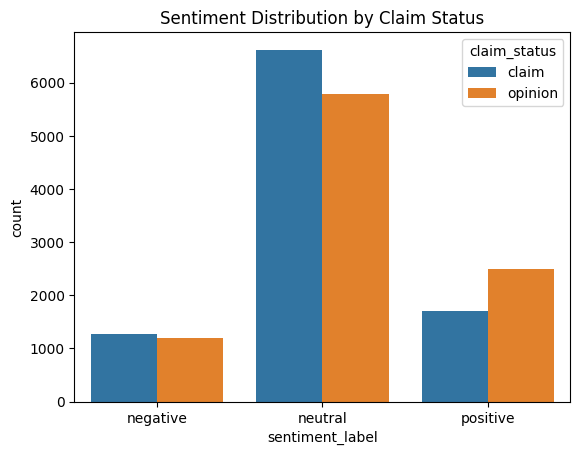

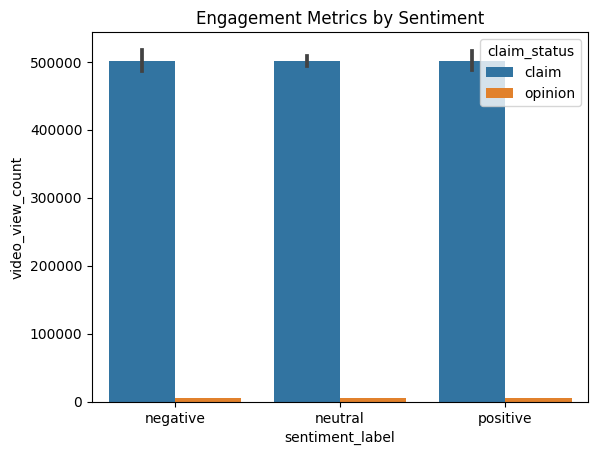

In [7]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/kaggle/input/tiktok/tiktok_dataset.csv")

# Preprocessing text
def clean_text(text):
    if not isinstance(text, str):
        return ""  # Return an empty string for non-string entries
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in word_tokenize(text) if word not in stop_words])

df['cleaned_text'] = df['video_transcription_text'].apply(clean_text)

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.05:
        return 'positive'
    elif analysis.sentiment.polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'
df['sentiment_label'] = df['cleaned_text'].apply(get_sentiment)

# Topic Modeling
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_text'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}: {[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]}")

# Visualization
sns.countplot(data=df, x='sentiment_label', hue='claim_status')
plt.title("Sentiment Distribution by Claim Status")
plt.show()

sns.barplot(data=df, x='sentiment_label', y='video_view_count', hue='claim_status')
plt.title("Engagement Metrics by Sentiment")
plt.show()

# Save results for the paper
df.to_csv("tiktok_analysis_results.csv", index=False)
